In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df= pd.read_csv("netflix_titles.csv")

In [3]:
#Some EDA
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print("Initial shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Initial shape: (8807, 12)

Column Names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
#To know non null count and datatypes
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#To know statistical Information
print("Statistical Information about the dataset:\n",df.describe())

Statistical Information about the dataset:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [7]:
#To remove duplicates rows
df=df.drop_duplicates()

In [13]:
# To handle missing values
df['country']=df['country'].fillna("Unknown")
df['rating']=df['rating'].fillna("Not Rated")
df['director']=df['director'].fillna("Not Mentioned")
df['cast']=df['cast'].fillna("Not Mentioned")

In [16]:
# Converting datetime and handle NaT
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [17]:
# Dropping missing rows 'title' or 'type'
df = df.dropna(subset=['title', 'type'])

In [20]:
#To Standardize text values
df['country'] = df['country'].str.title().str.strip()
df['type'] = df['type'].str.title().str.strip()
df['rating'] = df['rating'].str.upper().str.strip()

In [23]:
#Renaming Columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [24]:
# To check and fix datatypes 
df['release_year'] = df['release_year'].astype(int)

In [26]:
# Final step to check updated file
print("Cleaned Shape:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nCleaned Data Types:\n", df.dtypes)

Cleaned Shape: (8807, 12)

Missing values after cleaning:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

Cleaned Data Types:
 show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int32
rating                  object
duration                object
listed_in               object
description             object
dtype: object


# EDA

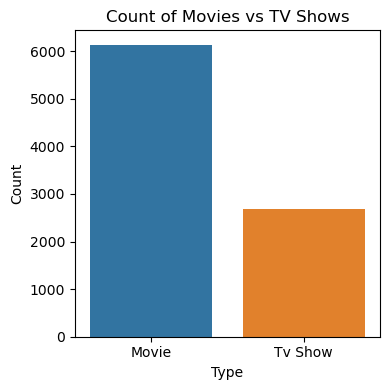

In [28]:
#1 Content Type Distribution
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

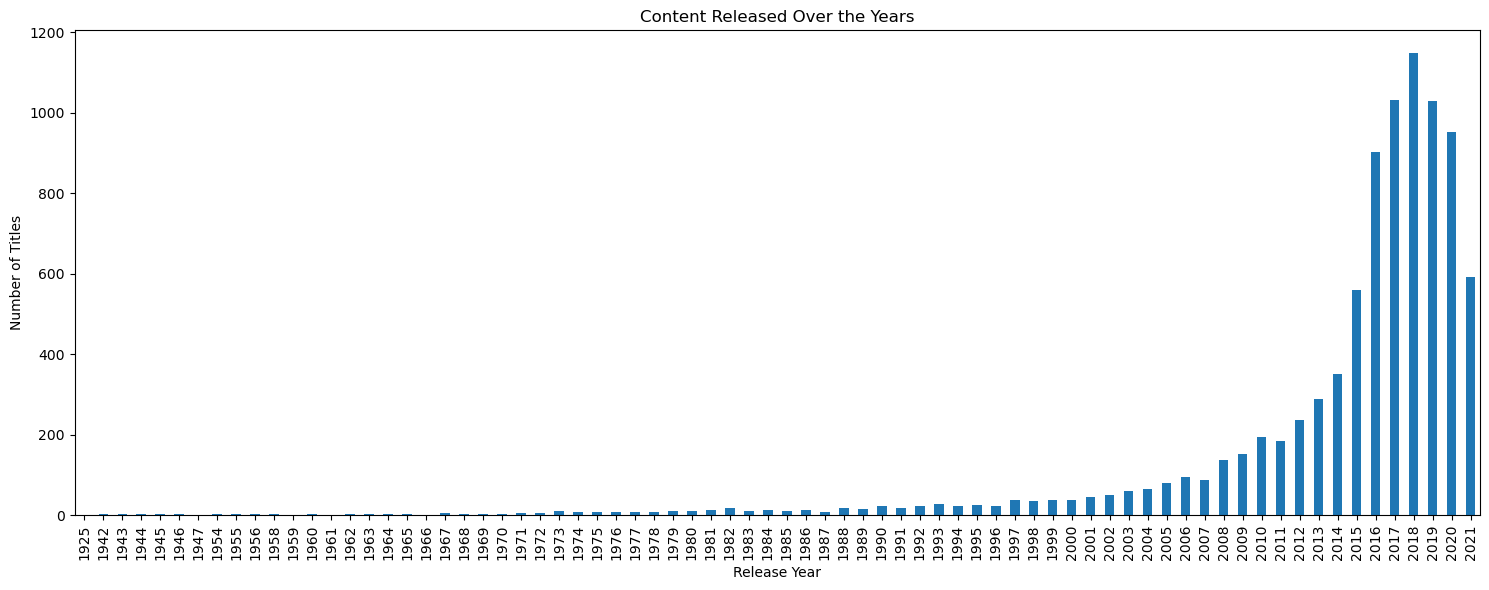

In [31]:
#2 Content Released Over Years
plt.figure(figsize=(15,6))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

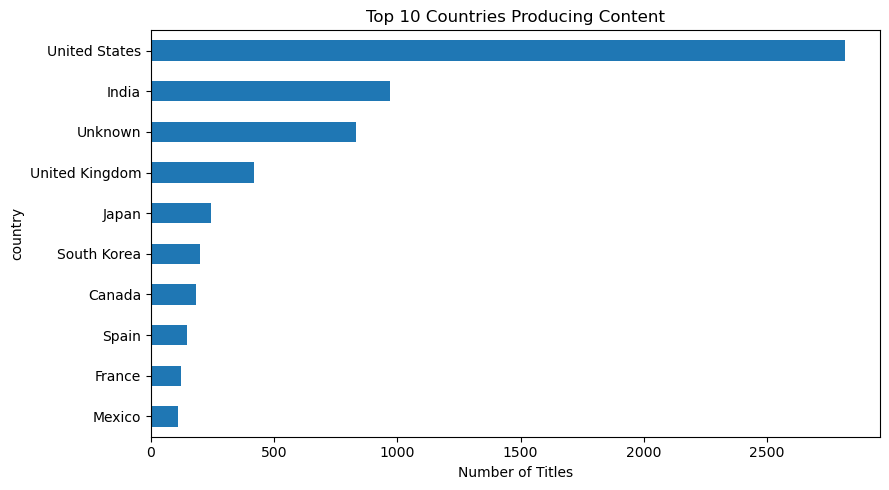

In [33]:
#3 Top 10 Countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', figsize=(9,5), title='Top 10 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

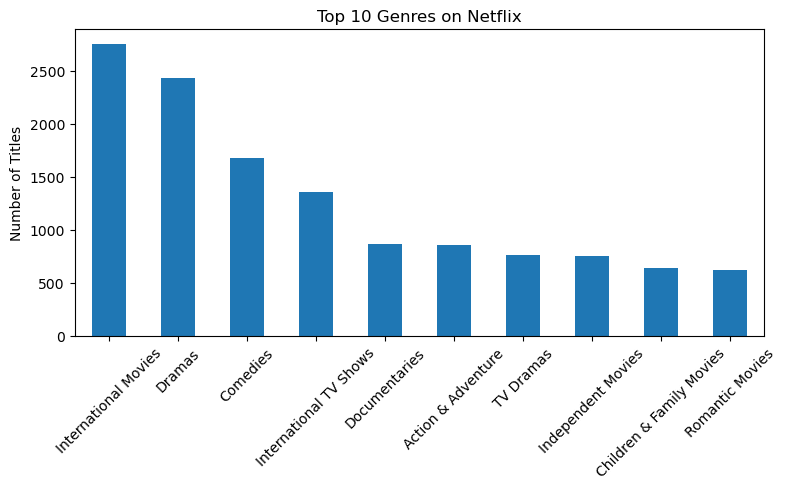

In [34]:
#4 Top 10 Genres (from 'listed_in')
from collections import Counter
genre_counter = Counter()
df['listed_in'].dropna().apply(lambda x: genre_counter.update([genre.strip() for genre in x.split(',')]))
top_genres = pd.Series(dict(genre_counter)).sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', figsize=(8,5), title='Top 10 Genres on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

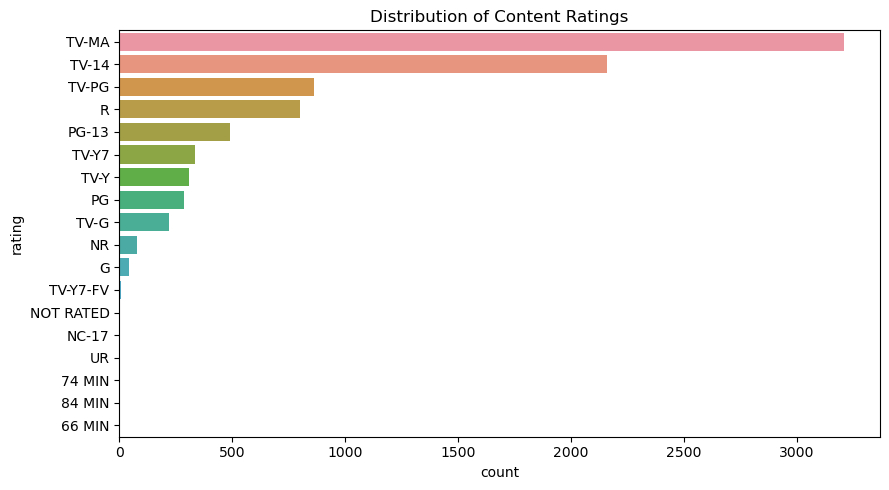

In [35]:
#5 Content Rating Distribution
plt.figure(figsize=(9,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.tight_layout()
plt.show()

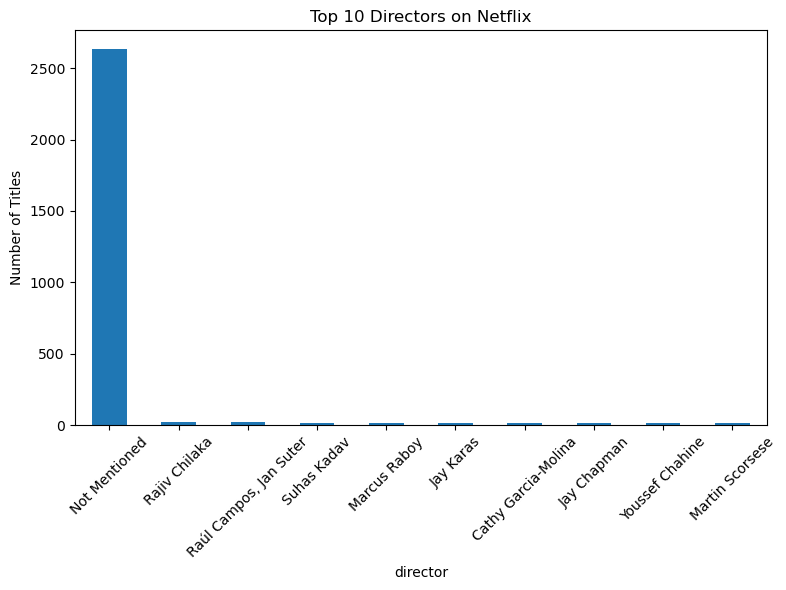

In [37]:
#6 Top 10 Directors
top_directors = df[df['director'] != 'Not Specified']['director'].value_counts().head(10)
top_directors.plot(kind='bar', title='Top 10 Directors on Netflix', figsize=(8,6))
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()